# 국제교류재단 외국인 민원 분석

## Import

In [ ]:
import pandas as pd
import folium
import numpy as np
import googlemaps
import math
from folium.features import DivIcon
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
import random
from scipy.stats import expon, reciprocal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM

## 1. 데이터

### 1.1 데이터 수집

외국인 민원 데이터 2015 1월 ~ 2020 12월 까지 수집

In [ ]:
##2015 월별 상담일지
df2015_1 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20150101-20150228.xlsx') #원본
df2015_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20150301-20150430.xlsx')
df2015_3 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20150501-20150531.xlsx')
df2015_4 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20150601-20150731.xlsx')
df2015_5 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20150801-20150930.xlsx')
df2015_6 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20151001-20151130.xlsx')
df2015_7 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2015/상담일지-20151201-20151231.xlsx')

##2016 월별 상담일지
df2016_1 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160101-20160229.xlsx')
df2016_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160301-20160331.xlsx')
df2016_3 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160401-20160430.xlsx')
df2016_4 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160501-20160531.xlsx')
df2016_5 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160601-20160630.xlsx')
df2016_6 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160701-20160731.xlsx')
df2016_7 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160801-20160831.xlsx')
df2016_8 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20160901-20160930.xlsx') #
df2016_9 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20161001-20161031.xlsx')
df2016_10 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20161101-20161130.xlsx')
df2016_11 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2016/상담일지-20161201-20161231.xlsx')

##2017 월별 상담일지
df2017_1 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170101-20170131.xlsx')
df2017_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170201-20170228.xlsx')
df2017_3 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170301-20170331.xlsx')
df2017_4 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170401-20170430.xlsx')
df2017_5 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170501-20170531.xlsx')
df2017_6 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170601-20170630.xlsx')
df2017_7 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170701-20170731.xlsx')
df2017_8 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170801-20170831.xlsx')
df2017_9 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20170901-20170930.xlsx')
df2017_10 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20171001-20171031.xlsx')
df2017_11 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20171101-20171130.xlsx')
df2017_12 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2017/상담일지-20171201-20171231.xlsx')

##2018 월별 상담일지
df2018_1 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180101-20180131.xlsx')
df2018_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180201-20180228.xlsx')
df2018_3 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180301-20180331.xlsx')
df2018_4 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180401-20180430.xlsx')
df2018_5 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180501-20180531.xlsx')
df2018_6 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180601-20180630.xlsx')
df2018_7 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180701-20180731.xlsx')
df2018_8 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180801-20180831.xlsx')
df2018_9 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20180901-20180930.xlsx')
df2018_10 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20181001-20181031.xlsx')
df2018_11 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20181101-20181130.xlsx')
df2018_12 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2018/상담일지-20181201-20181231.xlsx')

##2019 월별 상담일지
df2019_1 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190101-20190131.xlsx')
df2019_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/2월/상담일지-20190201-20190211.xlsx')
df2019_2_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/2월/상담일지-20190213-20190228.xlsx')
df2019_3 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190301-20190331.xlsx')
df2019_4 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190401-20190430.xlsx')
df2019_5 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/5월/상담일지-20190501-20190514.xlsx')
df2019_5_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/5월/상담일지-20190516-20190531.xlsx')
df2019_6 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190601-20190630.xlsx')
df2019_7 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190701-20190731.xlsx')
df2019_8 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190801-20190831.xlsx')
df2019_9 = pd.read_csv('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20190901-20190930.csv')
df2019_10 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20191001-20191031.xlsx')
df2019_11 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/상담일지-20191101-20191130.xlsx')
df2019_12 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/12월/상담일지-20191201-20191208.xlsx')
df2019_12_2 = pd.read_excel('/content/gdrive/MyDrive/국교제/pjt1/2019/12월/상담일지-20191210-20191231.xlsx')


#2020 년 상담일지
df2020 = pd.read_csv('/content/gdrive/MyDrive/국교제/pjt1/2020정제상담일지.csv')

데이터 프레임 병합

In [ ]:
df2015 = pd.concat([df2015_1,df2015_2,df2015_3,df2015_4,df2015_5,df2015_6,df2015_7], axis=0)
df2016 = pd.concat([df2016_1,df2016_2,df2016_3,df2016_4,df2016_5,df2016_6,df2016_7,df2016_8,df2016_9,df2016_10,df2016_11], axis=0)
df2017 = pd.concat([df2017_1,df2017_2,df2017_3,df2017_4,df2017_5,df2017_6,df2017_7,df2017_8,df2017_9,df2017_10,df2017_11,df2017_12], axis=0)
df2018 = pd.concat([df2018_1,df2018_2,df2018_3,df2018_4,df2018_5,df2018_6,df2018_7,df2018_8,df2018_9,df2018_10,df2018_11,df2018_12], axis=0)
df2019 = pd.concat([df2019_1,df2019_2,df2019_2_2,df2019_3,df2019_4,df2019_5,df2019_5_2,df2019_6,df2019_7,df2019_8,df2019_9,
                 df2019_10,df2019_11,df2019_12,df2019_12_2], axis=0)
df = pd.concat([df2015,df2016,df2017,df2018,df2019,df2020], axis=0)

### 1.2 데이터 정제

In [ ]:
df = pd.concat([df2015,df2016,df2017,df2018,df2019,df2020], axis=0)
#df.head(3)
#df.shape
#df.info()

In [ ]:

#결측치 확인
df.isnull().sum() 

필요없는 feature 삭제해 줍니다.

In [ ]:
# 필요없는 feature 삭제
df = df.drop(['날짜', '번호', '성명','전화','이메일', '전문상담연결', '상태', '체류자격', 'Unnamed: 0'], axis=1)

결측치를 제거해줍니다.

In [ ]:
##우선 결측치 제거하여 데이터 분석
df = df.loc[df['성별'].notna()]
df = df.loc[df['국적'].notna()]
df = df.loc[df['분류'].notna()]
df = df.loc[df['처리절차'].notna()]
df = df.reset_index(drop=True)
df.shape

In [ ]:
#결측치 확인
df.isnull().sum()

분류      0
방법      0
언어권     0
성별      0
국적      0
제목      0
문의내용    0
처리절차    0
등록일자    0
dtype: int64

등록일자가 datetime형식으로 되어있지 않아서 바꿔주고 날짜 순으로 정렬을 시킵니다.

년 / 월 / 일 / 시간 대 별 피쳐를 만들어 줍니다.

In [ ]:
df['등록일자']=pd.to_datetime(df['등록일자'])
df= df.sort_values(by=['등록일자'], ascending=True)

df['date'] = df.등록일자
df = df.drop('등록일자', axis= 1)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

## 2. EDA

연도별 민원 건수를 봅시다.

In [ ]:
df.groupby(['year'])['date'].count()

### 2.1. 카테고리(분류)별 시각화

In [ ]:
#년도별로 구분
plt.rcParams['figure.figsize'] = [25,7]
sns.countplot('year', hue='분류', data=df)
plt.show()

연도별 1위 카테고리

2015 : 임금/고용

2016 : 출입국/비자

2017~2019 : 외국인참여프로그램

2020 : 통역

In [ ]:
#시간대 별
plt.rcParams['figure.figsize'] = [25,7]
sns.countplot('hour', hue='분류', data=df)
plt.show()

근무 외 시간 데이터를 제거합니다.

In [ ]:
df=df.drop(df[(df['hour']>=18) | (df['hour'] == 12) | (df['hour']<9)].index)

In [ ]:
#시간별
plt.rcParams['figure.figsize'] = [25,7]
sns.countplot('hour', hue='분류', data=df)
plt.show()

민원의 카테고리별 개수를 알아봅시다.

In [ ]:
df['분류'].value_counts()

#### 2.1.1 '생활정보' 카테고리 특성

In [ ]:
df_life = df[df['분류']=='생활정보']
df_life.head()

년도, 월, 시간대별 민원 갯수 파악

In [ ]:
import matplotlib as mpl
df_life.groupby(['year', 'month','hour'])['분류'].count().plot()
plt.show()

In [ ]:
temp = df_life.groupby(['year', 'month', 'hour'])['분류'].count()
temp = pd.DataFrame(temp)
temp

##### 2.1.1.1. 생활정보 카테고리 시계열 분해

In [ ]:
from datetime import datetime
templist = []

for i in range(0,len(temp)):
  date_time_str = str(int(temp.index[i][0])) + '-' + str(int(temp.index[i][1])) + ' ' + str(int(temp.index[i][2]))
  date_time_obj = datetime.strptime(date_time_str, '%Y-%m %H')
  templist.append(date_time_obj)

In [ ]:
temp['date'] = templist
temp

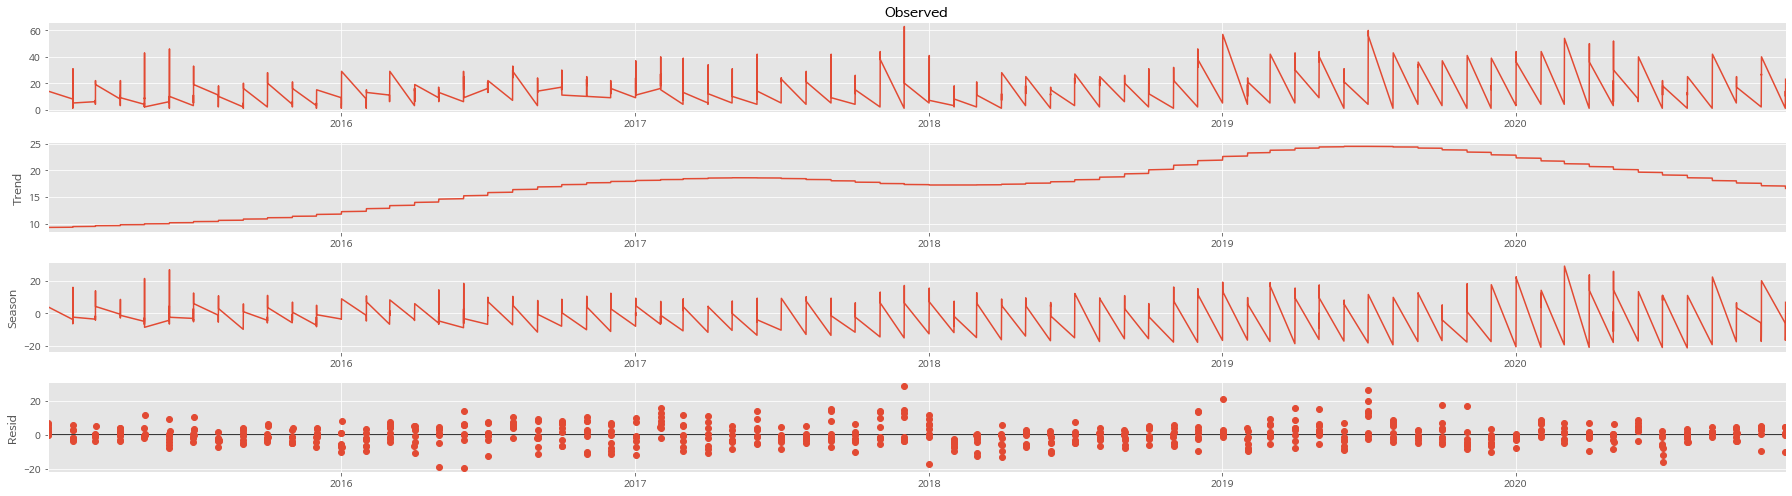

In [ ]:
stl = STL(temp[['date', '분류']].set_index('date'), period=96)
res = stl.fit()
res
temp['resid'] = res.resid.values

ax=res.plot() 
plt.show()

### 2.2. 성별 시각화

In [ ]:
plt.rcParams['figure.figsize'] = [7,4]
sns.countplot('성별', data=df)
plt.show()

대게는 비슷하나 여자가 조금 더 많은 것으로 판단

In [ ]:
plt.rcParams['figure.figsize'] = [17,7]
sns.countplot('year', hue='성별', data=df)
plt.show()

2015~2017 남자가 많고 2018부터는 여자가 많다

### 2.3. 국적

#### 2.3.1 국적 오타 수정

In [ ]:
df.groupby('국적').count().sort_values(by=['분류'], ascending=False).head(20)

In [ ]:
def country(country):
  df.loc[df.국적 == country,'국적'] = country.strip()

In [ ]:
# 수기로 수정

df.loc[df.국적 == 'Indonesia','국적']= '인도네시아'

df.loc[df.국적 == 'uzbekistan','국적']= '우즈베키스탄'
df.loc[df.국적 == 'UZBEKISTAN','국적']= '우즈베키스탄'
df.loc[df.국적 == 'Uzbekistan','국적']= '우즈베키스탄'
df.loc[df.국적 == 'Uzbekistan','국적']= '우즈베키스탄'
df.loc[df.국적 == 'Uzbekistan','국적']= '우즈베키스탄'
for i in df.groupby('국적').count().sort_values(by=['분류'], ascending=False).index:
    if type(i) == str:
      if "우즈" in i:
        df.loc[df.국적 == i, '국적'] = '우즈베키스탄'

df.loc[df.국적 == 'CHINA','국적']= '중국'

df.loc[df.국적 == 'russia','국적']= '러시아'
df.loc[df.국적 == '러','국적']= '러시아'

df.loc[df.국적 == 'USA','국적']= '미국'
df.loc[df.국적 == 'usa','국적']= '미국'

df.loc[df.국적 == '카나다','국적']= '캐나다'

df.loc[df.국적 == '한국','국적']= '대한민국'
df.loc[df.국적 == '한국(귀화)','국적']= '대한민국'
df.loc[df.국적 == '한국 ']

In [ ]:
df.groupby('국적').count().sort_values(by=['분류'], ascending=False).index

420개국이 수기로 적혀져있음

In [ ]:
df.groupby('국적').count().sort_values(by=['분류'], ascending=False).head(7)

탑 7개 나라만 뽑음

In [ ]:
df.groupby('국적').count().sort_values(by=['분류'], ascending=False).head(7).index

Index(['베트남', '중국', '대한민국', '인도네시아', '우즈베키스탄', '러시아', '미국'], dtype='object', name='국적')

#### 2.3.2 상위 7개 나라 (국적) 만 뽑은 데이터 프레임 dfCountry

In [ ]:
dfCountry = pd.DataFrame()
for i in df.groupby('국적').count().sort_values(by=['분류'], ascending=False).head(7).index:
  temp = df[df['국적'] == i]
  dfCountry = pd.concat([temp, dfCountry], axis=0)
dfCountry.head()

In [ ]:
#전체 나라 대비 상위 7개나라 지분 약 85%

round(dfCountry.shape[0]/df.shape[0]*100,2)

85.12

전체 나라 대비 상위 7개나라 지분 약 85%

In [ ]:
#연도별 국적 민원 갯수
plt.rcParams['figure.figsize'] = [25,7]
sns.countplot('year', hue='국적', data=dfCountry)
plt.show()

In [ ]:
dfCountry= dfCountry.sort_values(by=['date'], ascending=True)
dfCountry = dfCountry.reset_index(drop=True)
dfCountry.head()

### 2.4. 카테고리별 데이터프레임 만들기

날짜별로 판단하기 어려우므로 년도, 월, 시간대별 카테고리 데이터 프레임 만들기

In [ ]:
def time2(year, month, hour):
    year1 = dfCountry["year"] == year

    # lifeExp 컬럼을 선택합니다.
    # 컬럼의 값과 조건을 비교합니다.
    # 그 결과를 새로운 변수에 할당합니다.
    month1 = dfCountry["month"] == month

    hour1 = dfCountry["hour"] == hour
    # 두가지 조건를 동시에 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다. (AND)
    df2 = dfCountry[year1 & month1 & hour1]

    #ndf = pd.DataFrame
    # 결과를 출력합니다.
    #ndf.append(df["분류"].value_counts().index[0])
    #df["분류"].value_counts()[0]

    #print(df["분류"].value_counts()[0])
    
    d_frame = pd.DataFrame()
    for i in range(len(df2["분류"].value_counts())):
        data1 = df2["분류"].value_counts().index[i]
        data2 = df2["분류"].value_counts()[i]
        d_frame[data1] = [data2]
    
    d_frame['year'] = int(year)
    d_frame['month'] = int(month)
    d_frame['hour'] = int(hour)
    #d_frame["date"] = df2["등록일자"].mean()
    
    return d_frame

In [ ]:
s = pd.DataFrame(columns = ['통역', '생활정보', '출입국/비자', '임금/고용', '외국인참여프로그램', '번역', '기타',
       '전문상담(노무)', '사법/행정', '전문상담(법률)', '전문상담(체류)', '전문상담(법무)',
       '전문상담(기타)', '전문상담(부동산)', '비즈니스', '전문상담(세무)'])
for h in dfCountry["hour"].value_counts().index:
    for m in dfCountry["month"].value_counts().index:
        for y in dfCountry["year"].value_counts().index:
            s = pd.concat([s,time2(y, m, h)], axis=0)
s

In [ ]:
ndf = s.sort_values(['year','month','hour'])
ndf = ndf.fillna(0)
ndf= ndf.reset_index(drop=True)
ndf

## 3.모델링

## 3.1. '생활정보' 랜덤포레스트

576 row : 2015~2020년도 6개년을 8시간 (6년X12개월X8시간 =576)

In [ ]:
mdf = ndf.drop(['기타', '전문상담(노무)',
       '사법/행정', '전문상담(법률)', '전문상담(체류)', '전문상담(법무)', '전문상담(기타)', '전문상담(부동산)',
       '비즈니스', '전문상담(세무)'], axis=1)
mdf

### 3.1.1. 다음달 8시간 예측하는 종속변수 yhat 만들어주기

In [ ]:
mdf['yhat'] = mdf['생활정보'].shift(-8)

### 3.1.2. 학습 테이블, 예측 테이블 나누기

시계열 데이터 이므로 시계열 분해를 하여 잔차 적용

In [ ]:
#학습시킬 테이블과 예측시킬 테이블 나누기 (기존 y(COD) 는 삭제)
learn = mdf[mdf['yhat'].notnull()]
#learn = learn.drop(['통역'], axis=1)

predict = mdf[mdf['yhat'].isnull()]
#predict = predict.drop(["통역"], axis=1)

learn['yhat'].max()

from datetime import datetime
templist = []

for i in range(0,len(mdf)):
  date_time_str = str(int(mdf['year'][i])) + '-' + str(int(mdf['month'][i])) + " " + str(int(mdf['hour'][i]))
  date_time_obj = datetime.strptime(date_time_str, '%Y-%m %H')
  templist.append(date_time_obj)
mdf['date'] = templist

stl = STL(mdf[['date', '생활정보']].set_index('date'), period=8)
res = stl.fit()
res
mdf['resid'] = res.resid.values
mdf

### 3.1.3. 변수간 상관관계 도출

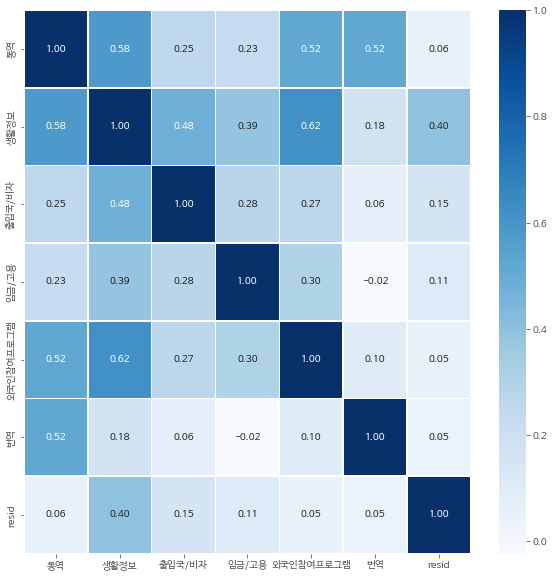

In [ ]:
#변수간 상관관계 확인
import matplotlib.pyplot as plt 
import seaborn as sns    
corr = mdf[['통역',	'생활정보',	'출입국/비자','임금/고용',	'외국인참여프로그램',	'번역','resid']].corr(method= 'pearson')

plt.figure(figsize=(10,10))
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

#임금/ 고용, 출입국/ 비자 제외

상관관계가 가장 작은 번역을 feature에서 제외해준다.

### 3.1.4. 스케일링 해주기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

learn_ft = learn.drop(['year',	'month',	'hour',	'yhat',	'date', '번역'], axis=1)
predict_ft = predict.drop(['year',	'month',	'hour',	'yhat',	'date', '번역'], axis=1)

sc = MinMaxScaler()

learn_sc = sc.fit_transform(learn_ft)
learn_sc = pd.DataFrame(learn_sc, columns=[learn_ft.columns], index=learn_ft.index)

predict_sc = sc.fit_transform(predict_ft)
predict_sc = pd.DataFrame(predict_sc, columns=[predict_ft.columns], index=predict_ft.index)

learn_sc.head()

### 3.1.5. 모델링 적용

In [ ]:
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

X = learn_sc.fillna(0)
y = learn['yhat'].fillna(0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=12345)

X_train = X.iloc[:472,:]
X_test = X.iloc[472:,:]
y_train = y.iloc[:472]
y_test = y.iloc[472:]

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

576개 컬럼에서 learn은 20년 12월 8시간(개)을 뺐으므로 568개 컬럼이 된다.

568개에서 마지막 96개(2019.12~2020.11 : 12개월 X 8시간) 를 test set으로 하고

2015.01~ 2019.11 을 train set으로 설정한다.

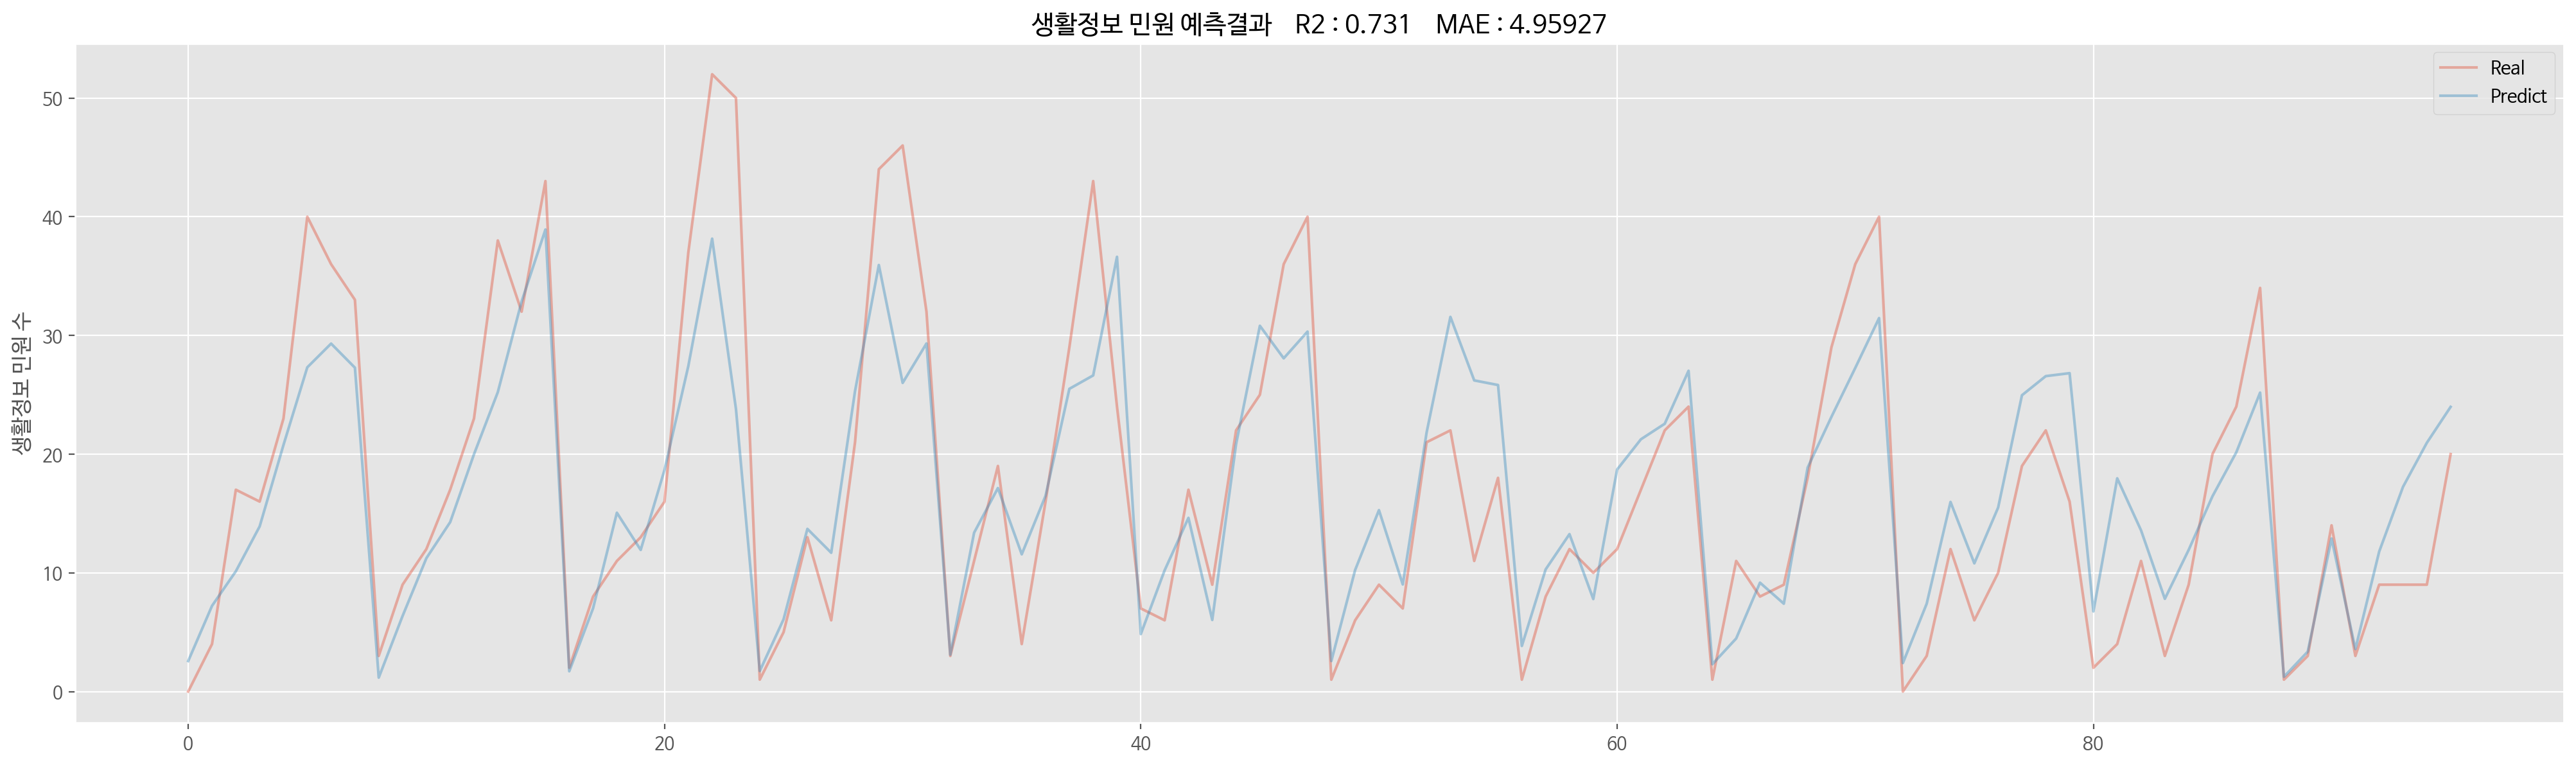

In [ ]:
plt.figure(dpi=200)
plt.title('생활정보 민원 예측결과    R2 : ' + str(R2)[:5] + '    MAE : ' + str(MAE)[:7])
plt.ylabel('생활정보 민원 수')
plt.plot(y_test.reset_index(drop=True), alpha = 0.4, label = 'Real')
plt.plot(rf_model.predict(X_test), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

2019 12월부터 2020 11월(말) 까지 데이터 이므로 

yhat (1개월 뒤 민원 수요 예측 모델 이므로) 으로 따지면

실제와 모델의 2020년 1월~12월(말) 민원 예측 결과

### 3.1.6. 하이퍼 파라미터 설정

In [ ]:
#하이퍼 파리미터 튜닝
from sklearn.model_selection import GridSearchCV

params =[
        {'n_estimators': [60, 80, 100, 120], 'max_features': [3, 4, 5, 6]}
    ]

rf_model2 = RandomForestRegressor()
rf_model2 = GridSearchCV(rf_model2, param_grid=params, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rf_model2.fit(X_train,y_train)
rf_model2.best_params_

{'max_features': 6, 'n_estimators': 60}

In [ ]:
cvres = rf_model2.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(round(np.sqrt(-mean_score),3), params)

5.619 {'max_features': 3, 'n_estimators': 60}
5.641 {'max_features': 3, 'n_estimators': 80}
5.697 {'max_features': 3, 'n_estimators': 100}
5.682 {'max_features': 3, 'n_estimators': 120}
5.496 {'max_features': 4, 'n_estimators': 60}
5.555 {'max_features': 4, 'n_estimators': 80}
5.562 {'max_features': 4, 'n_estimators': 100}
5.499 {'max_features': 4, 'n_estimators': 120}
5.633 {'max_features': 5, 'n_estimators': 60}
5.429 {'max_features': 5, 'n_estimators': 80}
5.435 {'max_features': 5, 'n_estimators': 100}
5.497 {'max_features': 5, 'n_estimators': 120}
5.429 {'max_features': 6, 'n_estimators': 60}
5.465 {'max_features': 6, 'n_estimators': 80}
5.53 {'max_features': 6, 'n_estimators': 100}
5.472 {'max_features': 6, 'n_estimators': 120}


### 정확도 약 73%

In [ ]:
y_pred2 = rf_model2.predict(X_test)
R22 = r2_score(y_test, y_pred2)
MAE2 = mean_absolute_error(y_test, y_pred2)
R22

0.7299475391643202

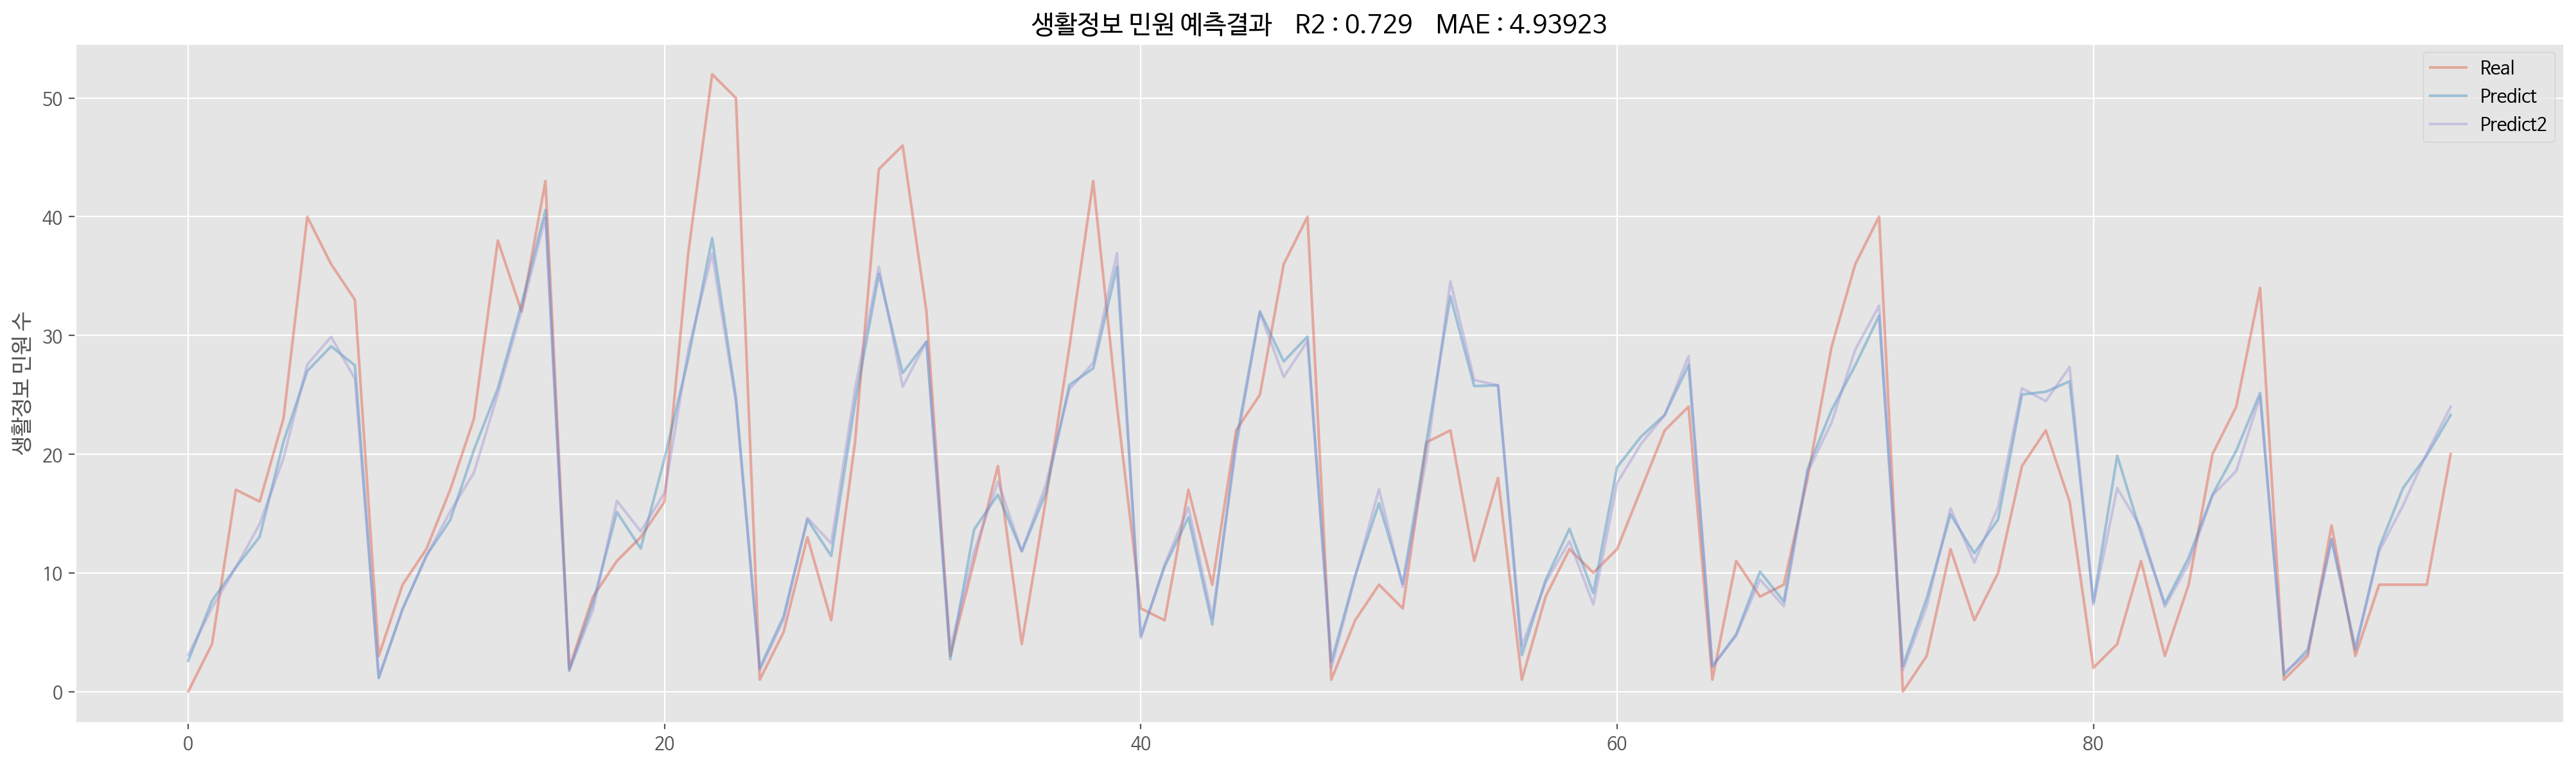

In [ ]:
plt.figure(dpi=200)
plt.title('생활정보 민원 예측결과    R2 : ' + str(R22)[:5] + '    MAE : ' + str(MAE2)[:7])
plt.ylabel('생활정보 민원 수')
plt.plot(y_test.reset_index(drop=True), alpha = 0.4, label = 'Real')
plt.plot(rf_model.predict(X_test), alpha = 0.4, label = 'Predict')
plt.plot(rf_model2.predict(X_test), alpha = 0.4, label = 'Predict2')
plt.legend()
plt.show()

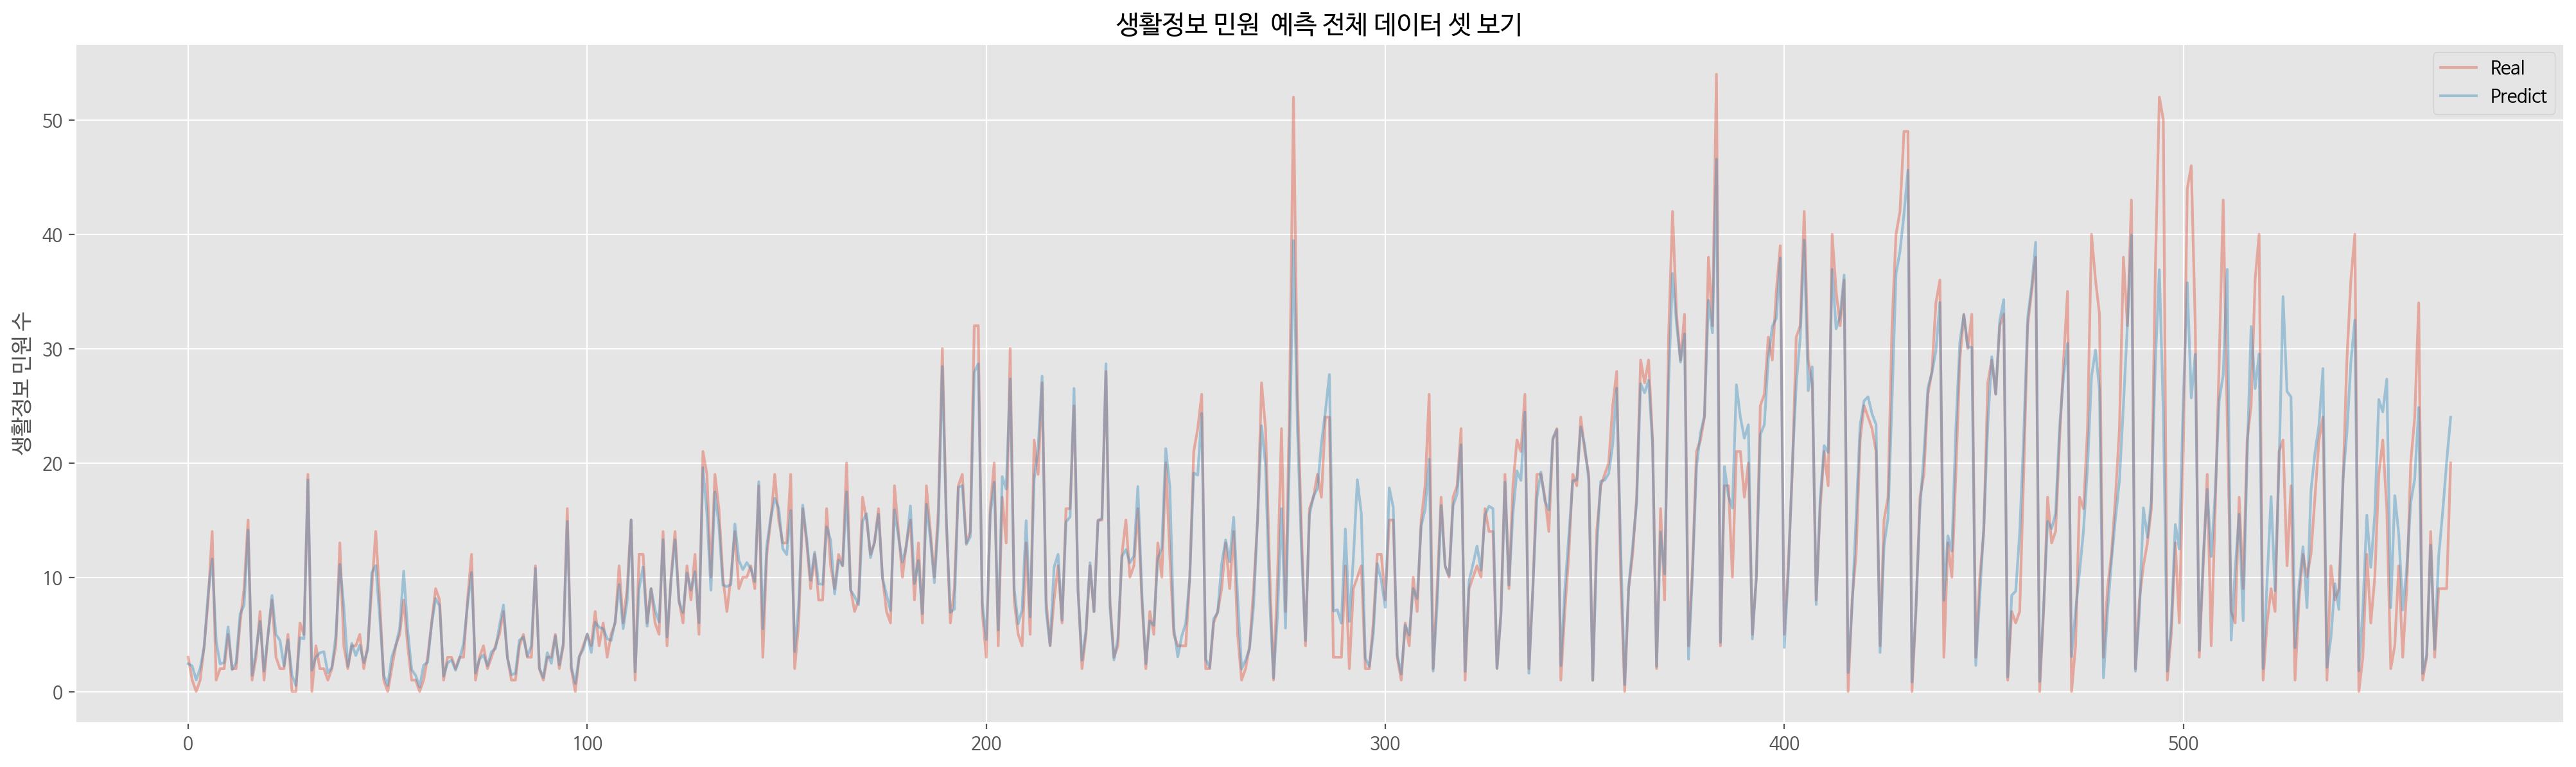

In [ ]:
plt.figure(dpi=200)
plt.title('생활정보 민원  예측 전체 데이터 셋 보기')
plt.ylabel('생활정보 민원 수')
plt.plot(y, alpha = 0.4, label = 'Real')
plt.plot(rf_model2.predict(X), alpha = 0.4, label = 'Predict')
plt.legend()
plt.show()

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
#MAE는 실제 관측값과 회귀식으로 예측한 값 차이를 제곱 합이 아닌 절대값의 합

MSE = mean_squared_error(y_test, y_pred)
#MSE는 SSE를 자유도로 나누어준 값이다. 
#자유도를 나누어 줌으로써 MSE가 크다의 의미는 단순히 데이터가 많아서 크다는 것이 아니라(SSE는 데이터 수가 많아지면 커진다.) 실제 차이가 커서 크다고 판단할 수 있게 되는 것이다.

def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

SMAPE = smape(y_test, y_pred)

print('MAE : ', MAE)
print('MSE : ', MSE)

MAE :  4.906979166666667
MSE :  45.037228125000006


### 3.1.7 실제 2021년도 예측 값 대입

In [ ]:
#12개월 후 값 예측하여 값 저장
rf_newpred = rf_model2.predict(predict_sc)

#기존 yhat이 NaN 행에  예측 값 넣어주기
predict['yhat'] = rf_newpred
predict[['date', '생활정보', 'yhat']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,생활정보,yhat
568,2020-12-01 09:00:00,1,1.433333
569,2020-12-01 10:00:00,3,5.183333
570,2020-12-01 11:00:00,14,27.550000
571,2020-12-01 13:00:00,3,5.016667
572,2020-12-01 14:00:00,9,19.166667
573,2020-12-01 15:00:00,9,35.000000
574,2020-12-01 16:00:00,9,35.666667
575,2020-12-01 17:00:00,20,37.000000


(2020년도 까지의 데이터 가지고) 2021년 1월 생활정보 민원수요 예측 값 (9시~17시) : yhat 컬럼